**COVID - 19 ANALYSIS
   ANALYSED BY - SUMIT SINGH BISHT
                 sumitbisht867@gmail.com**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/covid_vaccine_statewise.csv
/kaggle/input/covid19-in-india/covid_19_india.csv


In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

1. **READING DATA**

In [3]:
# Loading and Reading of Provided Data
df = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
state_testing = pd.read_csv("../input/covid19-in-india/StatewiseTestingDetails.csv")
df_vac = pd.read_csv("../input/covid19-in-india/covid_vaccine_statewise.csv")

In [4]:
# Display of Dataframe
df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16850 non-null  int64 
 1   Date                      16850 non-null  object
 2   Time                      16850 non-null  object
 3   State/UnionTerritory      16850 non-null  object
 4   ConfirmedIndianNational   16850 non-null  object
 5   ConfirmedForeignNational  16850 non-null  object
 6   Cured                     16850 non-null  int64 
 7   Deaths                    16850 non-null  int64 
 8   Confirmed                 16850 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [6]:
# Cheching for any null values
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
# Dropping the columns that are not important in analysis
df.drop(["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], inplace = True, axis = 1)

In [8]:
# Changing dtype of Date
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [9]:
# Finding the Active Cases 
df['Active_Cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
16845,2021-07-07,Telangana,613124,3703,628282,11455
16846,2021-07-07,Tripura,63964,701,68612,3947
16847,2021-07-07,Uttarakhand,332006,7338,340882,1538
16848,2021-07-07,Uttar Pradesh,1682130,22656,1706818,2032
16849,2021-07-07,West Bengal,1472132,17834,1507241,17275


**STATE-WISE ANALYSIS**

In [10]:
statewise = pd.pivot_table(df, values = ["Confirmed", "Deaths","Cured"], index = "State/UnionTerritory", aggfunc = max)
statewise["Recovery Rate"] = statewise["Cured"]*100 / statewise["Confirmed"]
statewise["Mortality Rate"] = statewise["Deaths"]*100 / statewise["Confirmed"]
statewise = statewise.sort_values(by = "Confirmed", ascending = False)
statewise.style.background_gradient(cmap = "YlOrRd")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6113335,5872268,123531,96.056702,2.020681
Kerala,2996094,2877557,13960,96.043615,0.465940
Karnataka,2859595,2784030,35526,97.357493,1.242344
Tamil Nadu,2503481,2435872,33132,97.299400,1.323437
Andhra Pradesh,1908065,1861937,12898,97.582472,0.675973
Uttar Pradesh,1706818,1682130,22656,98.553566,1.327382
West Bengal,1507241,1472132,17834,97.670645,1.183222
Delhi,1434687,1408853,25001,98.199328,1.742610
Chhattisgarh,996359,977893,13462,98.146652,1.351119


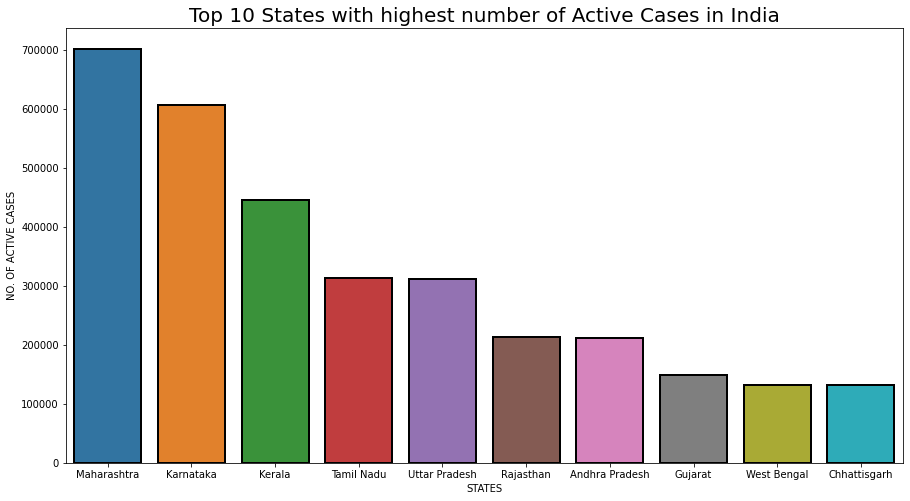

In [11]:
# Display Active Cases
top_10_active_states = df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by = ['Active_Cases'],ascending=False).reset_index()
fig = plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of Active Cases in India", size = 20)
ax = sns.barplot(data=top_10_active_states.iloc[:10], y = "Active_Cases", x = "State/UnionTerritory", linewidth = 2, edgecolor = 'black')
plt.xlabel("STATES")
plt.ylabel("NO. OF ACTIVE CASES")
plt.show()

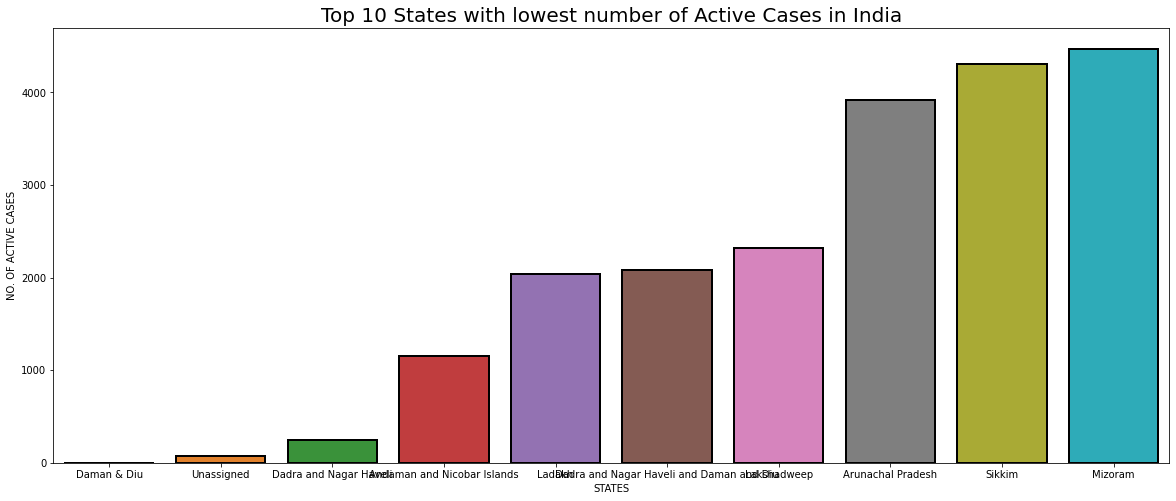

In [12]:
# Display states with lowest no. of active cases 
last_10_active_states = df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by = ['Active_Cases']).reset_index()
fig = plt.figure(figsize=(20,8))
plt.title("Top 10 States with lowest number of Active Cases in India", size = 20)
ax = sns.barplot(data=last_10_active_states.iloc[:10], y = "Active_Cases", x = "State/UnionTerritory", linewidth = 2, edgecolor = 'black')
plt.xlabel("STATES")
plt.ylabel("NO. OF ACTIVE CASES")
plt.show()

Text(0.5, 1.0, ' Rate of Active cases in Top 5 Affected States in India')

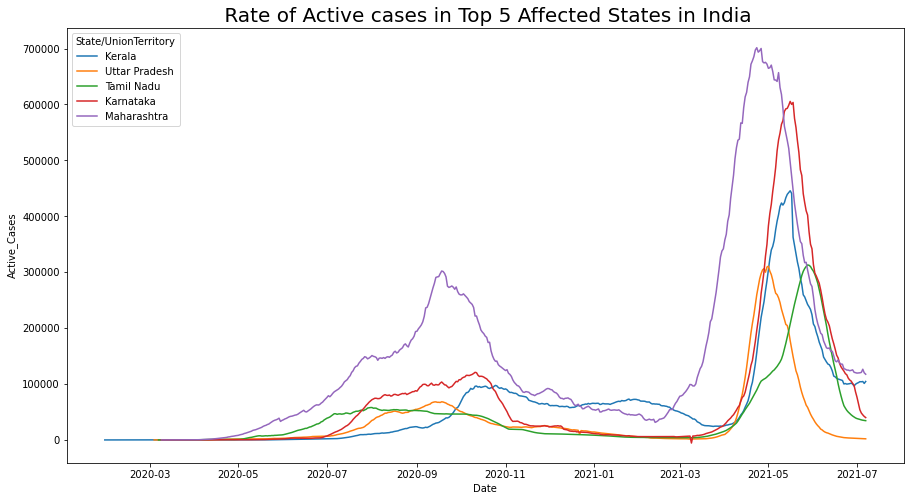

In [13]:
# Growth of Active Cases
fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df[df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh'])], x='Date', y='Active_Cases', hue='State/UnionTerritory')
ax.set_title(" Rate of Active cases in Top 5 Affected States in India", size=20)

In [14]:
india_cases = df[df['Date'] == df['Date'].max()].copy().fillna(0)
india_cases.index = india_cases["State/UnionTerritory"]
india_cases = india_cases.drop(['State/UnionTerritory','Date'], axis=1)

In [15]:
india_cases.head(10)

,Cured,Deaths,Confirmed,Active_Cases
State/UnionTerritory,,,,
Andaman and Nicobar Islands,7343,128,7487,16
Andhra Pradesh,1861937,12898,1908065,33230
Arunachal Pradesh,34525,181,37879,3173
Assam,493306,4717,522267,24244
Bihar,711913,9612,722746,1221
Chandigarh,60837,809,61752,106
Chhattisgarh,977893,13462,996359,5004
Dadra and Nagar Haveli and Daman and Diu,10532,4,10575,39
Delhi,1408853,25001,1434687,833


In [16]:
Trend = df.groupby(['Date'])['Confirmed', 'Deaths','Cured','Active_Cases'].sum().reset_index()

In [17]:
Trend.head()

,Date,Confirmed,Deaths,Cured,Active_Cases
0,2020-01-30,1,0,0,1
1,2020-01-31,1,0,0,1
2,2020-02-01,2,0,0,2
3,2020-02-02,3,0,0,3
4,2020-02-03,3,0,0,3


In [18]:
fig = go.Figure(go.Bar(x= Trend.Date, y= Trend.Cured, name='Recovered'))
fig.add_trace(go.Bar(x=Trend.Date, y= Trend.Deaths, name='Deaths'))
fig.add_trace(go.Bar(x=Trend.Date, y= Trend.Confirmed, name='Confirmed'))
fig.add_trace(go.Bar(x=Trend.Date, y= Trend.Active_Cases, name='Active Cases'))

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                 paper_bgcolor='white',
                 plot_bgcolor = "white",)
fig.show()

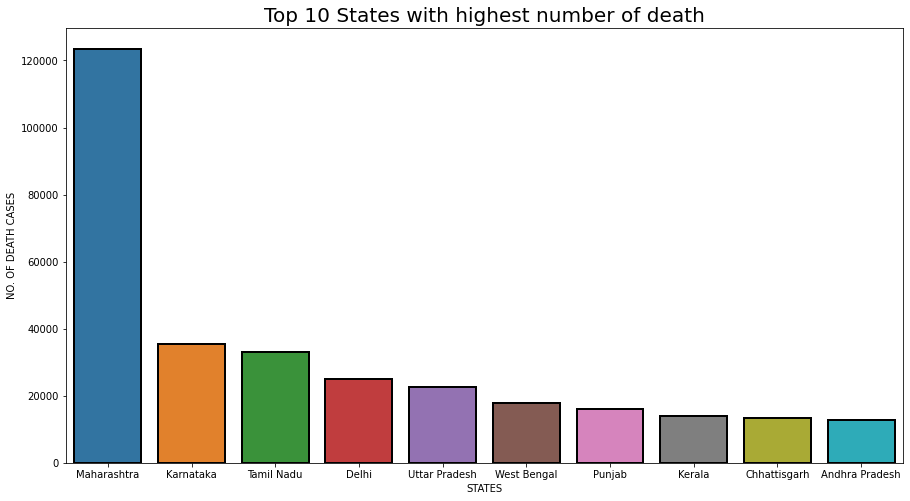

In [19]:
# Display  Death Cases 
top_10_death_states = india_cases.sort_values('Deaths',ascending = False)[:10]
fig = plt.figure(figsize = (15,8))
plt.title("Top 10 States with highest number of death", size=20)
ax = sns.barplot(data = top_10_death_states.iloc[:10], y = top_10_death_states.Deaths, x = top_10_death_states.index, linewidth=2, edgecolor = 'black')
plt.xlabel("STATES")
plt.ylabel("NO. OF DEATH CASES")
plt.show()

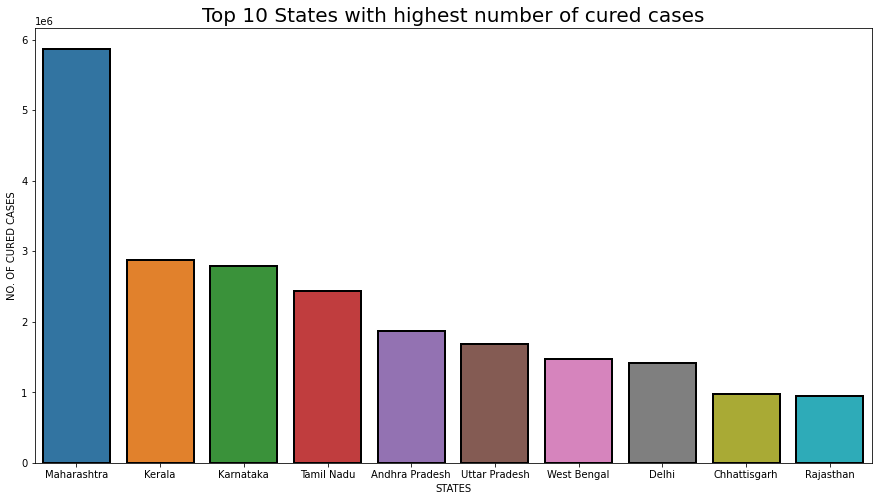

In [20]:
# Display Cured Cases
top_10_cured_cases = india_cases.sort_values('Cured', ascending = False)[:10]
fig = plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of cured cases", size = 20)
ax = sns.barplot(data = top_10_cured_cases.iloc[:10], y = top_10_cured_cases.Cured, x = top_10_cured_cases.index, linewidth = 2 , edgecolor = 'black')
plt.xlabel("STATES")
plt.ylabel("NO. OF CURED CASES")
plt.show()

**VACCINATION ANALYSIS**

In [21]:
#Renaming 'Updated On' column
df_vac.rename(columns = {'Updated On':'Date'}, inplace = True)
df_vac.head(10)

,Date,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,132784.0,233143.0,38.0,5367.0,360598.0,NaN,NaN,NaN,NaN,NaN,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,193899.0,355402.0,80.0,8128.0,541253.0,NaN,NaN,NaN,NaN,NaN,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,267856.0,491049.0,103.0,11192.0,747816.0,NaN,NaN,NaN,NaN,NaN,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,296283.0,538647.0,128.0,13156.0,821902.0,NaN,NaN,NaN,NaN,NaN,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,444137.0,832766.0,201.0,18858.0,1258246.0,NaN,NaN,NaN,NaN,NaN,1277104.0


In [22]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 6699 non-null   object 
 1   State                                6699 non-null   object 
 2   Total Doses Administered             6364 non-null   float64
 3   Total Sessions Conducted             6363 non-null   float64
 4   Total Sites                          6363 non-null   float64
 5   First Dose Administered              6363 non-null   float64
 6   Second Dose Administered             6363 non-null   float64
 7   Male(Individuals Vaccinated)         6363 non-null   float64
 8   Female(Individuals Vaccinated)       6363 non-null   float64
 9   Transgender(Individuals Vaccinated)  6363 non-null   float64
 10  Total Covaxin Administered           6363 non-null   float64
 11  Total CoviShield Administered 

In [23]:
df_vac.isnull().sum()

Date                                      0
State                                     0
Total Doses Administered                335
Total Sessions Conducted                336
Total Sites                             336
First Dose Administered                 336
Second Dose Administered                336
Male(Individuals Vaccinated)            336
Female(Individuals Vaccinated)          336
Transgender(Individuals Vaccinated)     336
Total Covaxin Administered              336
Total CoviShield Administered           336
Total Sputnik V Administered           4962
AEFI                                   2519
18-45 years (Age)                      2522
45-60 years (Age)                      2521
60+ years (Age)                        2521
Total Individuals Vaccinated            336
dtype: int64

In [24]:
# Removing columns with most no. of null values
df_vac = df_vac.drop(['Total Sputnik V Administered','AEFI', '18-45 years (Age)','45-60 years (Age)','60+ years (Age)'], axis = 1)

In [25]:
vac=df_vac[df_vac.State!='India']
vac.rename(columns = {"Total Individuals Vaccinated": "Total"}, inplace = True)

In [26]:
vac.head()

,Date,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total
183,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,23.0
184,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,23.0
185,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,42.0
186,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,89.0
187,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,124.0


In [27]:
# States with most no. of vaccinated individuals
max_vac=vac.groupby('State')['Total'].sum().to_frame('Total')
max_vac=max_vac.sort_values('Total',ascending=False)[:5]
max_vac


,Total
State,
Maharashtra,1.717369e+09
Uttar Pradesh,1.526352e+09
Rajasthan,1.390911e+09
Gujarat,1.320173e+09
West Bengal,1.126840e+09


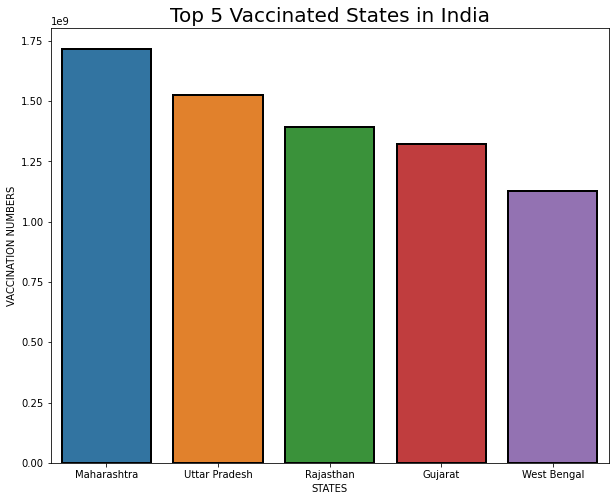

In [28]:
fig = plt.figure(figsize = (10,8))
plt.title("Top 5 Vaccinated States in India", size = 20)
x = sns.barplot(data = max_vac.iloc[:10],y = max_vac.Total, x = max_vac.index, linewidth=2, edgecolor='black')
plt.xlabel("STATES")
plt.ylabel("VACCINATION NUMBERS")
plt.show()

In [29]:
# States with least no. of vaccinated individuals
min_vac=vac.groupby('State')['Total'].sum().to_frame('Total')
min_vac=min_vac.sort_values('Total')[:5]
min_vac


,Total
State,
Lakshadweep,2686210.0
Andaman and Nicobar Islands,9942734.0
Ladakh,11528285.0
Dadra and Nagar Haveli and Daman and Diu,16009176.0
Sikkim,20925439.0


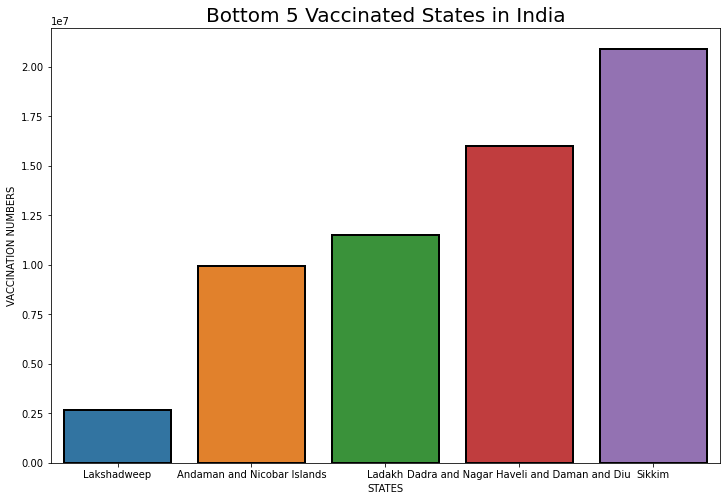

In [30]:
fig = plt.figure(figsize = (12,8))
plt.title("Bottom 5 Vaccinated States in India", size = 20)
x = sns.barplot(data = min_vac.iloc[:10],y = min_vac.Total, x = min_vac.index, linewidth=2, edgecolor='black')
plt.xlabel("STATES")
plt.ylabel("VACCINATION NUMBERS")
plt.show()

In [31]:
# Percentage of Gender 
male = vac["Male(Individuals Vaccinated)"].sum() 
female = vac["Female(Individuals Vaccinated)"].sum()  
trans = vac["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")


**THANK YOU**